# faça todas as tarefas tendo como objeto de estudo a sua proposta de aplicação de banco de dados definida na primeira aula.

Obs. Você fez o seu projeto de banco de dados evoluir através dos artefatos solicitados em algumas práticas até aqui no Módulo 3. Revise cada etapa do seu projeto de banco de dados e gere os documentos que estão sendo solicitados abaixo, Gere um documento .pdf e submeta no link que estará dispoinível em breve.

Caso queira fazer algerações no projeto inicial proposto, não há problema.


# Questão 1 - Especificação: Definição do minimundo

Apresente os requisitos de banco de dados para a sua aplicação em construção.

Os moradores de uma república possuem a necessidade de obter uma melhor organização de suas tarefas, tanto domésticas quanto acadêmicas, a fim de obter uma melhora em sua otimização de tempo e melhor aproveitamento nos estudos. Desta forma, efetuaram a criação de um sistema no qual seria possível não só administrar as tarefas, mas também dividi-las por áreas de interesse e com a possibilidade de designar pessoas e prazos.

O processo envolve 4 entidades: Pessoa, Tarefa, Ambiente e Atribuição. A Pessoa é identificada por informações como seu nome, email e número de telefone. A Tarefa possui um nome, descrição (sobre o que deve ser feito), prazo de entrega, estado (se está concluída ou não), data de conclusão, data de início e tempo gasto. Ambiente possui informações como o número do administrador, o email do administrador, a data de criação, o nome do ambiente, a quantidade de membros e os membros presentes no grupo. Atribuição é uma tabela de relacionamento que associa pessoas a tarefas e ambientes. Ela mantém as informações sobre quem está atribuído a quais tarefas e em quais ambientes.

Existem diversos relacionamentos entre as entidades. Inicialmente, uma Pessoa pode criar um Ambiente, adicionando mais membros e atribuindo a eles diversas tarefas, incluindo a si mesma. É importante haver uma descrição da Tarefa para que não haja dúvidas e nem atrasos na entrega. Uma Pessoa que é membro de um Ambiente pode criar um novo para poder administrar. As atribuições deverão ser realizadas pelo membro que é o administrador do Ambiente. Se não há nenhum membro no ambiente, ele deverá ser automaticamente excluído.



# Resposta Questão 1:





# Questão 2 - Modelo de dados conceitual: DER Estendido

Faça o desenho do DER Estendido da aplicação do seu projeto. Considere todos os tipos de entidade e seus atributos, e todos os tipos de relacionamentos que possam existir entre as entidades.


# Resposta Questão 2:
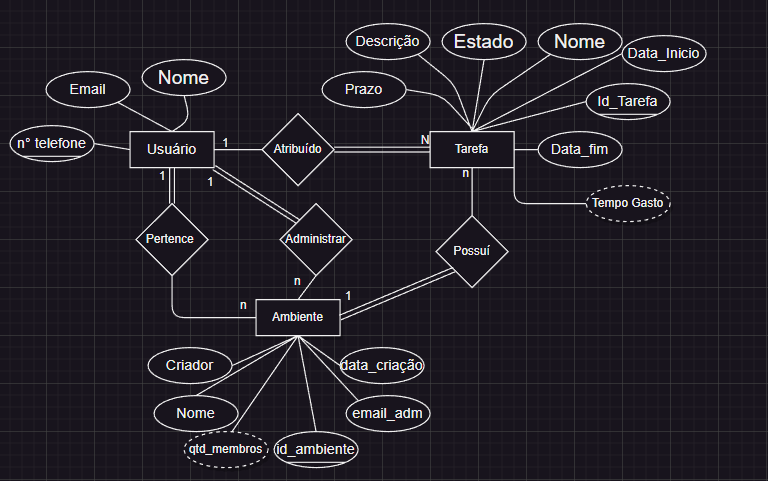


**Correção após os comentários da aula**


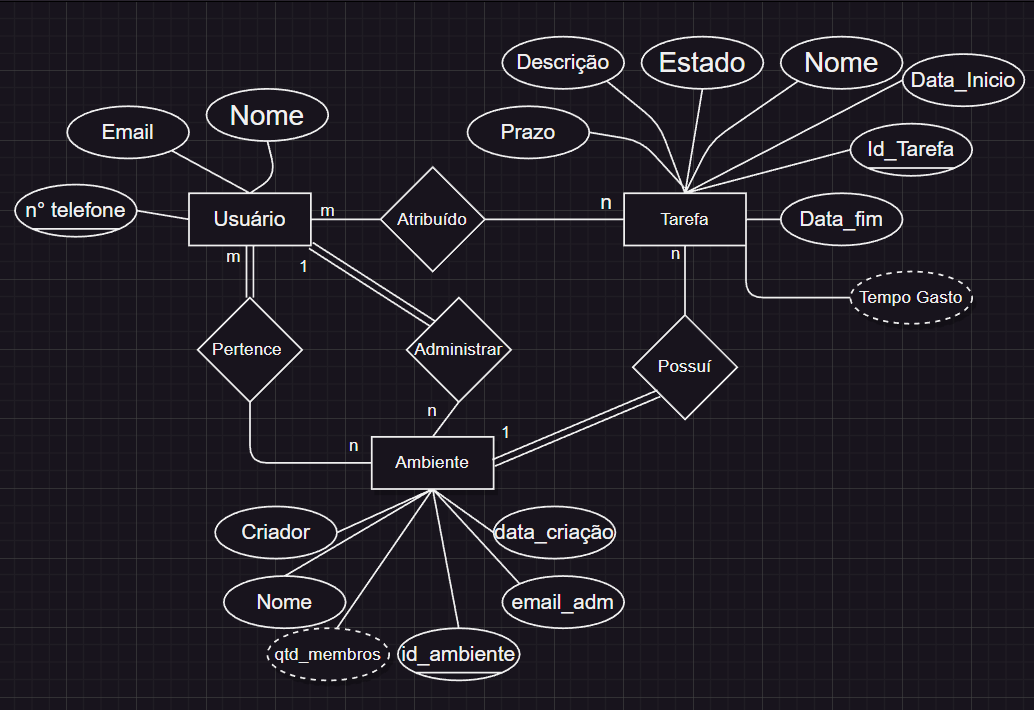


# Questão 3 - Projeto lógico do banco relacional: Diagrama de esquema relacional

Apresente o seu projeto lógico de banco de dados, através do diagrama de esquema relacional, completo.



# Resposta Questão 3:
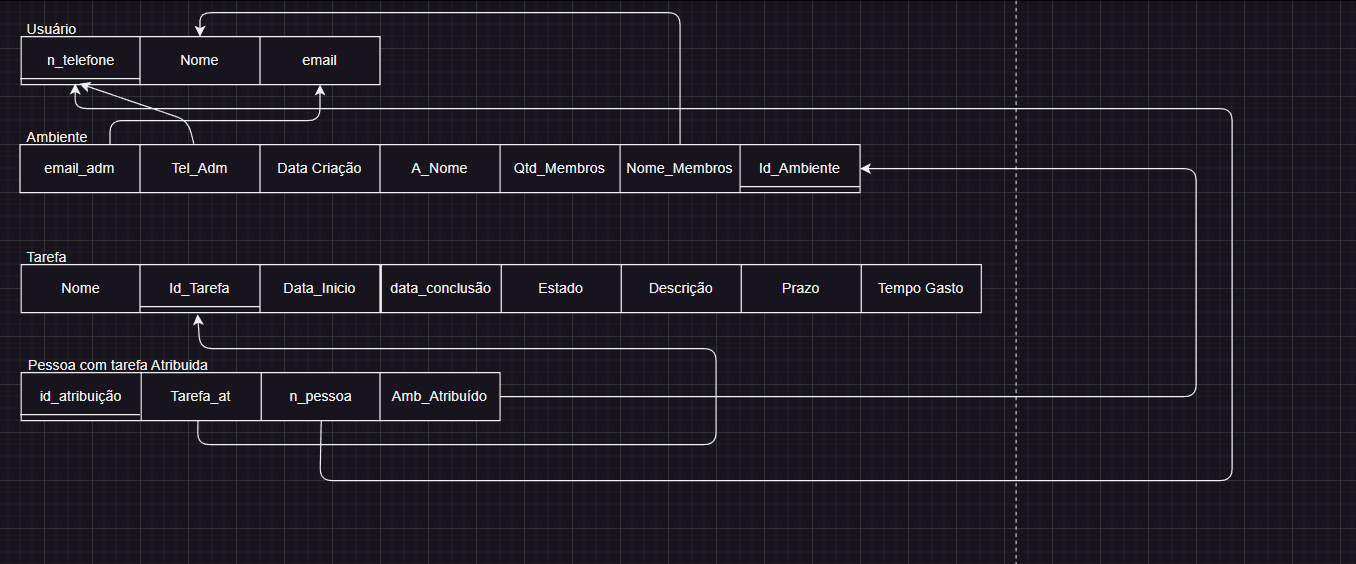


**Correção após os comentários da aula**


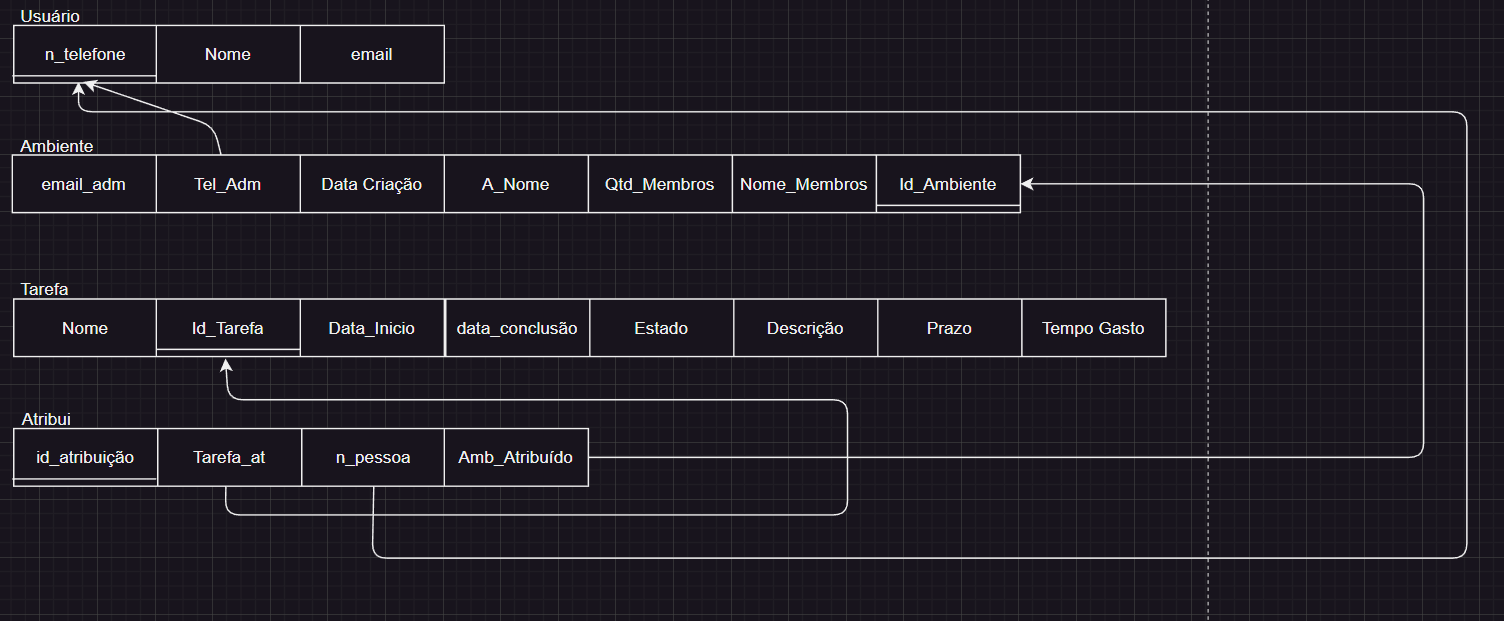



# Questão 4 - Modelagem de dados objeto-relacional: Definição dos UDTs

Apresente os UDTs (tipos definidos pelo usuário) e as definições de criação de tabelas do banco para representar as estruturas de dados, considerando que os objetos devem ser persistidos.



# Resposta Questão 4:





In [1]:
-- Definindo tipos de usuário (UDTs)
CREATE TYPE TipoPessoa AS (
    Numero VARCHAR(20),
    Nome VARCHAR(255),
    Email VARCHAR(255)
    
    INSTANTIABLE
    NOT FINAL
    REF IS SYSTEM GENERATED
);

CREATE TYPE TipoTarefa AS (
    IDTarefa INT,
    Nome VARCHAR(255),
    Descricao TEXT,
    Prazo DATE,
    Estado VARCHAR(20),
    DataConclusao DATE,
    DataInicio DATE,
    TempoGasto INT
    
    INSTANTIABLE
    NOT FINAL
    REF IS SYSTEM GENERATED
);

CREATE TYPE TipoAmbiente AS (
    IDAmbiente INT,
    NumeroAdm INT,
    EmailAdm VARCHAR(255),
    DataCriacao DATE,
    NomeAmbiente VARCHAR(255),
    QuantidadeMembros INT,
    Membros VARCHAR(255)
    
    INSTANTIABLE
    NOT FINAL
    REF IS SYSTEM GENERATED
);

CREATE TYPE TipoAtribuicao AS (
    IDAtribuicao INT,
    IDPessoa INT,
    IDTarefa INT,
    IDAmbiente INT
);


-- Tabela Pessoa usando o tipo de usuário TipoPessoa
CREATE TABLE TabelaPessoa (
    Numero VARCHAR(20) PRIMARY KEY,
    Dados TipoPessoa
);

-- Tabela Tarefa usando o tipo de usuário TipoTarefa
CREATE TABLE TabelaTarefa (
    IDTarefa INT PRIMARY KEY,
    Dados TipoTarefa
);

-- Tabela Ambiente usando o tipo de usuário TipoAmbiente
CREATE TABLE TabelaAmbiente (
    IDAmbiente INT PRIMARY KEY,
    Dados TipoAmbiente
);

CREATE TABLE TabelaAtribuicao (
    IDAtribuicao INT PRIMARY KEY,
    Dados TipoAtribuicao
);


#A parte de cima é a correção após os comentários da aula,
#onde eu tinha feito apenas a parte relacional do projeto, fiz um sql puro.


'''-- Tabela Pessoa
CREATE TABLE Pessoa (
    Numero VARCHAR(20) PRIMARY KEY, -- numero de telefone da pessoa, que será usado como chave primaria
    Nome VARCHAR(255) NOT NULL,
    Email VARCHAR(255) NOT NULL
);

-- Tabela Tarefa
CREATE TABLE Tarefa (
    ID_Tarefa INT PRIMARY KEY,
    Nome VARCHAR(255),
    Descricao TEXT NOT NULL,
    Prazo DATE,
    Estado VARCHAR(20),
    DataConclusao DATE,
    DataInicio DATE,
    TempoGasto INT -- Adicionando a coluna TempoGasto para armazenar a diferença em dias
);

-- Atualização da coluna TempoGasto
UPDATE Tarefa
SET TempoGasto = julianday(DataConclusao) - julianday(DataInicio);

-- Tabela Ambiente
CREATE TABLE Ambiente (
    ID_Ambiente INT PRIMARY KEY,
    NumeroAdm INT,
    EmailAdm VARCHAR(255),
    DataCriacao DATE,
    NomeAmbiente VARCHAR(255) NOT NULL,
    QuantidadeMembros INT,
    Membros VARCHAR(255), -- Coluna para armazenar o nome dos membros
    FOREIGN KEY (NumeroAdm, EmailAdm) REFERENCES Pessoa(Numero, Email), -- pegando as chaves estrangeiras "nome" e "email" da tabela pessoa
    FOREIGN KEY (ID_Ambiente) REFERENCES Tarefa(ID_Tarefa) -- Relacionamento com Tarefa
);

-- Tabela de Atribuições
-- Relaciona entre Pessoas, Tarefaa e Ambientes
CREATE TABLE Atribuicao (
    ID_Atribuicao INT PRIMARY KEY,
    ID_Pessoa INT,
    ID_Tarefa INT,
    ID_Ambiente INT,
    FOREIGN KEY (ID_Pessoa) REFERENCES Pessoa(Numero),
    FOREIGN KEY (ID_Tarefa) REFERENCES Tarefa(ID_Tarefa),
    FOREIGN KEY (ID_Ambiente) REFERENCES Ambiente(ID_Ambiente)
);

-- Realizando a inserção de 10 pessoas
INSERT INTO Pessoa (Numero, Nome, Email)
VALUES
    ('11987654321', 'Pessoa 1', 'pessoa1@email.com'),
    ('21987654321', 'Pessoa 2', 'pessoa2@email.com'),
    ('31987654321', 'Pessoa 3', 'pessoa3@email.com'),
    ('41987654321', 'Pessoa 4', 'pessoa4@email.com'),
    ('51987654321', 'Pessoa 5', 'pessoa5@email.com'),
    ('61987654321', 'Pessoa 6', 'pessoa6@email.com'),
    ('71987654321', 'Pessoa 7', 'pessoa7@email.com'),
    ('81987654321', 'Pessoa 8', 'pessoa8@email.com'),
    ('91987654321', 'Pessoa 9', 'pessoa9@email.com'),
    ('101987654321', 'Pessoa 10', 'pessoa10@email.com');

-- Realizando a inserção de 5 tarefas
INSERT INTO Tarefa (ID_Tarefa, Nome, Descricao, Prazo, Estado, DataConclusao, DataInicio, TempoGasto)
VALUES
    (1, 'Tarefa 1', 'Descrição da Tarefa 1', '2023-09-10', 'Concluída', '2023-09-12', '2023-09-05', 7),
    (2, 'Tarefa 2', 'Descrição da Tarefa 2', '2023-09-15', 'Concluída', '2023-09-18', '2023-09-10', 8),
    (3, 'Tarefa 3', 'Descrição da Tarefa 3', '2023-09-20', 'Concluída', '2023-09-25', '2023-09-15', 10),
    (4, 'Tarefa 4', 'Descrição da Tarefa 4', '2023-09-30', 'Em Andamento', NULL, '2023-09-20', NULL),
    (5, 'Tarefa 5', 'Descrição da Tarefa 5', '2023-10-05', 'Em Andamento', NULL, '2023-09-28', NULL);

-- Realizando a inserção de 2 ambientes
INSERT INTO Ambiente (ID_Ambiente, NumeroAdm, EmailAdm, DataCriacao, NomeAmbiente, QuantidadeMembros, Membros)
VALUES
    (1, '11987654321', 'pessoa1@email.com', '2023-08-01', 'Ambiente 1', 7, 'Pessoa 1, Pessoa 2, Pessoa 3, Pessoa 4, Pessoa 5, Pessoa 6, Pessoa 7'),
    (2, '21987654321', 'pessoa2@email.com', '2023-08-15', 'Ambiente 2', 10, 'Pessoa 1, Pessoa 2, Pessoa 3, Pessoa 4, Pessoa 5, Pessoa 6, Pessoa 7, Pessoa 8, Pessoa 9, Pessoa 10');

-- Atribuir a Tarefa 4 à Pessoa 3 na tabela de Atribuições
INSERT INTO Atribuicao (ID_Pessoa, ID_Tarefa)
VALUES (3, 4);

SELECT * FROM Pessoa;
SELECT * FROM Tarefa;
SELECT * FROM Atribuicao;
SELECT * FROM Ambiente;
'''



SyntaxError: invalid syntax (2251236959.py, line 1)